In [2]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as smf #for OLS
import statsmodels.api as sm #for ANOVA

# Assumption Tests
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

/Users/siyang/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Call in Sample Dataset

 * elect_lag: Household average electricity monsumption per Month (kwh)
 * temp: Average monthly temperature (Degree Celsius)
 * holiday: No. non-weekend public holidays per month
 * weekend: No. of weekends per month
 * days: No. extra days per month from Feb (which is the month with lowest days ie, 28)

In [3]:
df = pd.read_csv('./data/sample_elect.csv')

In [4]:
df.head()

,month,temp,elect_lag,holiday,weekend,days
0,1/1/05,26.6,408.0,1,10,3
1,1/2/05,28.5,446.0,2,8,0
2,1/3/05,28.5,496.0,1,8,3
3,1/4/05,28.7,496.0,0,9,2
4,1/5/05,28.5,519.0,2,9,3


In [5]:
df.dtypes

month         object
temp         float64
elect_lag    float64
holiday        int64
weekend        int64
days           int64
dtype: object

In [6]:
df2 = df.dropna()
df2 = df2.copy()

### Preprocess Some Fields

In [7]:
df2['weekend_holiday'] = df2['holiday'] + df2['weekend']

### Tests on Assumptions
Linear Regression is a parametric test & requires the fulfilment of assumptions that includes:
 * Linear relationship
 * Normal distribution
 * No or little multicollinearity (predictors should be independent to each other)
 * No auto-correlation
 * Homoscedasticity (Homogeneity of Variance)
 
https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

##### Plot for Normality

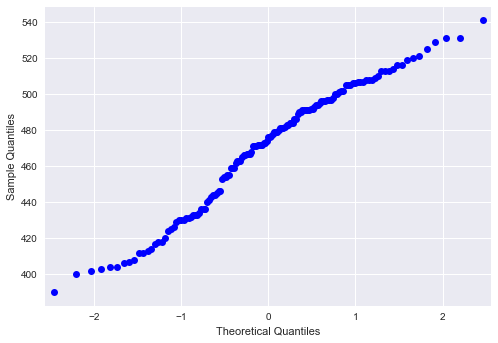

In [8]:
# QQ-Plot for normality test
sm.qqplot(df2['elect_lag']);

##### Plot for Homogeneity of Variance

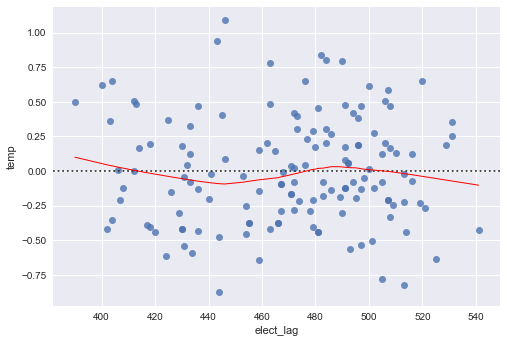

In [9]:
# Residual Plot
# does not allow plotting of multiple predictors
sns.residplot('elect_lag','temp', data=df2, lowess=True, \
              line_kws={'color':'red', 'lw':1});

# lowess = locally weighted scatterplot smooth, or local regression

##### Levene Test for Homogeneity of Variance
This is a non-paramatric test

In [10]:
levene(df2['elect_lag'],df2['temp'],df2['weekend_holiday'],df2['days'])

LeveneResult(statistic=263.96450294612305, pvalue=3.036329849471091e-107)

p-value > 0.05, hence there is homogeneity of variance

##### Breush-Pagan Test for Homogeneity of Variance
This is a parametric test that requires the use of residual for computation

In [13]:
name = ['Lagrange multiplier statistic', 'p-value of LMS', 
        'F-Statistics value', 'F-Statistics p-value']
test = het_breuschpagan(ols.resid, ols.model.exog)
list(zip(name,test))

[('Lagrange multiplier statistic', 1.8902512057586298),
 ('p-value of LMS', 0.5954948494217787),
 ('F-Statistics value', 0.6206632776864828),
 ('F-Statistics p-value', 0.6027703999322875)]

F-statistics p-value > 0.05, hence there is homogeneity of variance

### Linear Regression, or Ordinary Least Squares (OLS)

 * '+' : test each variable separately
 * ':' : test interaction effect of variables together
 * '*' : test both individual and interaction affect
 * C(variable) : test for categorical variable, only necessary when value is numeric or float

In [12]:
# fit the model
# This tests each variable separately in the linear equation
ols = smf.ols('elect_lag~temp+days+weekend_holiday', data=df2).fit()
# use print function to get a proper summary
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:              elect_lag   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     167.6
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           5.69e-46
Time:                        14:16:36   Log-Likelihood:                -601.19
No. Observations:                 143   AIC:                             1210.
Df Residuals:                     139   BIC:                             1222.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -641.0704     56.485    -

In [14]:
# This tests interaction effect of the variables in the linear equation
ols2 = smf.ols('elect_lag~temp:days:weekend_holiday', data=df2).fit()
print(ols2.summary())

                            OLS Regression Results                            
Dep. Variable:              elect_lag   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     11.41
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           0.000946
Time:                        14:16:43   Log-Likelihood:                -704.99
No. Observations:                 143   AIC:                             1414.
Df Residuals:                     141   BIC:                             1420.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [15]:
# This tests the individual & interaction effect of each variable in the linear equation
ols3 = smf.ols('elect_lag~temp*days*weekend_holiday', data=df2).fit()
print(ols3.summary())

                            OLS Regression Results                            
Dep. Variable:              elect_lag   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     71.95
Date:                Tue, 07 Aug 2018   Prob (F-statistic):           1.86e-42
Time:                        14:16:44   Log-Likelihood:                -599.44
No. Observations:                 143   AIC:                             1215.
Df Residuals:                     135   BIC:                             1239.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

##### Interpreting the Regression Summary

 * __R-squared__: Percentage of variability of dataset that can be explained by the model
 * __Adjusted R-squared__: R-squared adjusted by number of predictors
 * __AIC/BIC__: Score to compare the quality between models using the same dataset. Nothing to do with how good the fit is. The less the better.
 * __Coef__: Coefficient of the regression equation with the predictor. Can be used to find out if it is positively or negatively correlated to the response.
 * __P>|t|__: p-value, test if the predictor is significantly influencing the response.

In [16]:
# print just r-squared
ols.rsquared

0.7833774857545566

### Predicting Response a Using Random Entry

In [18]:
# predict electricity consumption using predictors
# column names have to be the same
print(ols.predict(df2[['temp','days','weekend_holiday']][:1]))
print(ols2.predict(df2[['temp','days','weekend_holiday']][:1]))
print(ols3.predict(df2[['temp','days','weekend_holiday']][:1]))

0    425.477451
dtype: float64
0    478.724289
dtype: float64
0    423.412021
dtype: float64
